In [4]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

plt.style.use('ggplot')
import scipy.stats as ss
from statsmodels.tsa.stattools import acf

from arch import arch_model


## Part A


## i)

Read in data, compute log returns etc. Plot hist, kde & normal fit

In [5]:
df = pd.read_csv("./data/QRM-2022-cw1-data-a.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['log_returns'] = np.log(df['SX5E']).diff()

In [6]:
mean = df['log_returns'].mean()
stdev = df['log_returns'].std()
skew = df['log_returns'].skew()
kurt = df['log_returns'].kurtosis()

print(f"Mean: {mean}")
print(f"Stdev: {stdev}")
print(f"Skew: {skew}")
print(f"Kurtosis: {kurt}")

Mean: 0.00015487112907364611
Stdev: 0.012441542517269
Skew: -0.777391523854068
Kurtosis: 10.114398493613315


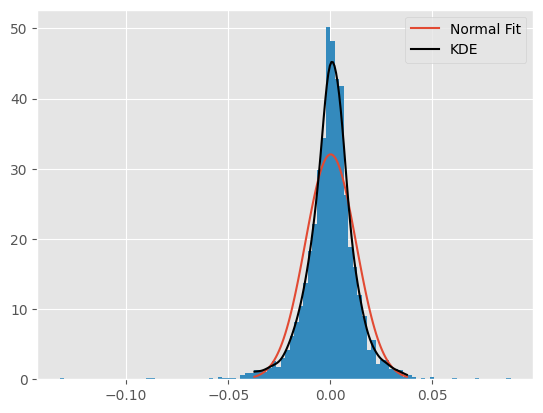

In [7]:

kde = ss.gaussian_kde(df['log_returns'].dropna())
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 100)

plt.plot(x, ss.norm.pdf(x, mean, stdev), label= 'Normal Fit');
plt.hist(df['log_returns'], bins=100, density=True); 
plt.plot(x, kde(x), label='KDE', color='k');

plt.legend(); plt.show()

## A ii)

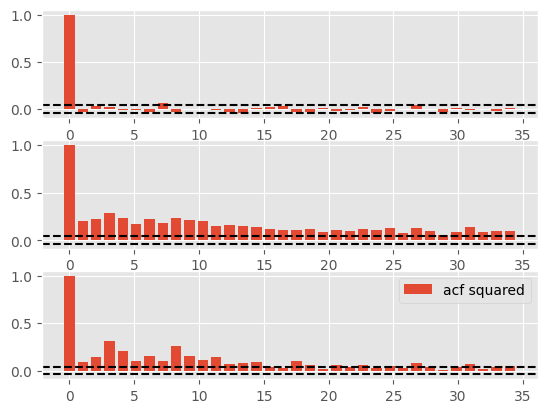

In [8]:

y_acf = acf(df['log_returns'].dropna().to_list())

x = np.linspace(0,len(y_acf),len(y_acf))

y_acf_abs = acf(np.abs(df['log_returns'].dropna()).to_list())
y_acf_sq = acf(np.power(df['log_returns'].dropna(), 2).to_list())

#create ci horizontal lines, apparently this should be (Z value for 95% CI)/sqrt(num_observations)
ci = 1.96/np.sqrt(df['log_returns'].dropna().count())


# need to fix these plots to make them look more like lecuture notes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.axhline(y=ci, linestyle='--', color='k')
ax1.axhline(y=-1*ci, linestyle='--', color='k')
ax1.bar(x, y_acf, label='ACF');

ax2.axhline(y=ci, linestyle='--', color='k')
ax2.axhline(y=-1*ci, linestyle='--', color='k')
ax2.bar(x, y_acf_abs, label='Acf abs'); 

ax3.axhline(y=ci, linestyle='--', color='k')
ax3.axhline(y=-1*ci, linestyle='--', color='k')
ax3.bar(x, y_acf_sq, label='acf squared');

plt.legend(); plt.show()


# A iii)

In [9]:
# make GARCH(1,1) model with normal innovations
model = arch_model(df['log_returns'].dropna(),
                 mean='Constant', 
                 vol='GARCH', 
                 p=1, q=1, rescale=True, dist='normal')

model_fit = model.fit()



Iteration:      1,   Func. Count:      6,   Neg. LLF: 16948.414220073522
Iteration:      2,   Func. Count:     15,   Neg. LLF: 48527592930.20491
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5179.524691374434
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4707.68847100696
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3846.5235683315423
Iteration:      6,   Func. Count:     43,   Neg. LLF: 3747.53359436742
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3747.5191473352024
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3747.5177716301496
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3747.5177684965056
Iteration:     10,   Func. Count:     62,   Neg. LLF: 3747.517768495862
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3747.5177684965056
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


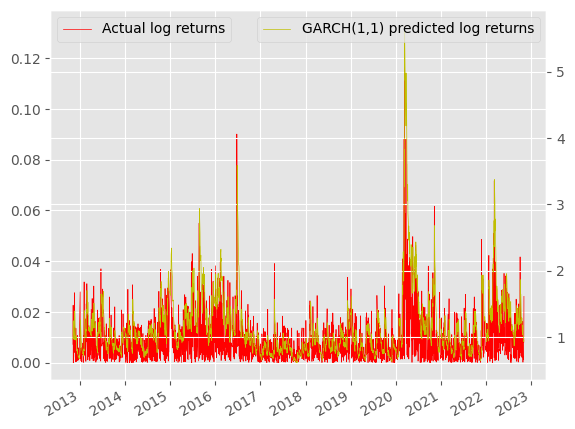

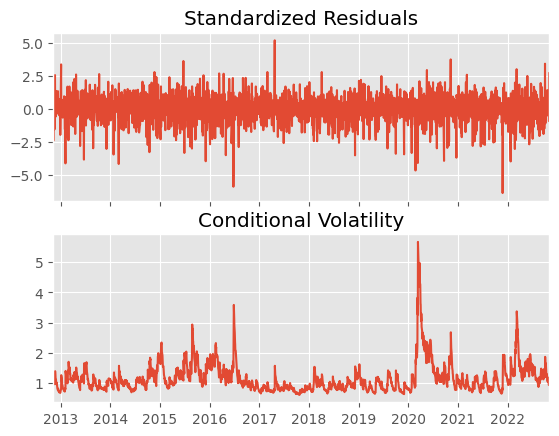

In [13]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(np.abs(df['log_returns'].dropna()), 'r-', linewidth=0.5, label='Actual log returns')
ax2.plot(model_fit.conditional_volatility, 'y-', linewidth=0.5, label='GARCH(1,1) predicted log returns')

ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
# ax1.xaxis.set_minor_locator(mdates.MonthLocator()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax1.legend(loc=0); ax2.legend(loc=1)
model_fit.plot(); plt.show()



## a iv)

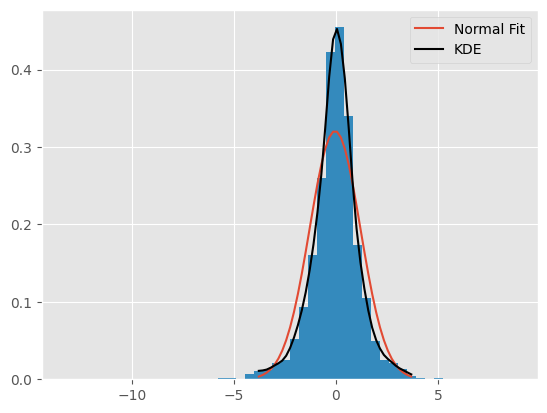

In [11]:
errors_std = np.std(model_fit.resid)
errors_mu = np.mean(model_fit.resid)

kde = ss.gaussian_kde(model_fit.resid)

x = np.linspace(errors_mu - 3*errors_std, errors_mu + 3*errors_std, 40)

plt.plot(x, ss.norm.pdf(x, errors_mu, errors_std), label= 'Normal Fit');

plt.plot(x, kde(x), label='KDE', color='k');
plt.hist(model_fit.resid, bins=50, density=True);


plt.legend(); plt.show()

### doesnt look super notmal too me...



## A v)

In [ ]:
# poa
# 1. fit arimia model for the mea
# 2. fit garch model to the residuals 1,1 with t dist 



In [41]:

# fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA


# fit arma model
model = ARIMA(df['log_returns'], order=(1,0,1))
arma_model_fit = model.fit()

# fir garch model on residuals
residuals = arma_model_fit.resid

garch_model_resid = arch_model(residuals.dropna(),
                 mean='Constant', 
                 vol='GARCH', 
                 p=1, q=1, rescale=True, dist='t')

garch_model_resid_fit = garch_model_resid.fit()

c:\Users\George\projects\masters\qrm1\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\George\projects\masters\qrm1\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\George\projects\masters\qrm1\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 106023.946127715
Iteration:      2,   Func. Count:     17,   Neg. LLF: 41902.49798929039
Iteration:      3,   Func. Count:     26,   Neg. LLF: 6869.495411764901
Iteration:      4,   Func. Count:     34,   Neg. LLF: 6130.5114705139895
Iteration:      5,   Func. Count:     43,   Neg. LLF: 5813.519090550475
Iteration:      6,   Func. Count:     50,   Neg. LLF: 3646.8089550111363
Iteration:      7,   Func. Count:     57,   Neg. LLF: 3646.152012944796
Iteration:      8,   Func. Count:     64,   Neg. LLF: 3645.958534458028
Iteration:      9,   Func. Count:     70,   Neg. LLF: 3645.9337027847514
Iteration:     10,   Func. Count:     76,   Neg. LLF: 3645.9323915345735
Iteration:     11,   Func. Count:     82,   Neg. LLF: 3645.9323679404333
Iteration:     12,   Func. Count:     87,   Neg. LLF: 3645.932367940428
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3645.9323679404333
            Iterations:

In [63]:
# use the arma model to predict mu one time period ahead

garch_model_resid_fit.conditional_volatility




Date
2012-11-06    0.993113
2012-11-07    0.965673
2012-11-08    1.259330
2012-11-09    1.176300
2012-11-12    1.100068
                ...   
2022-10-31    1.011717
2022-11-01    0.951950
2022-11-02    0.952228
2022-11-03    0.953098
2022-11-04    0.960840
Name: cond_vol, Length: 2501, dtype: float64

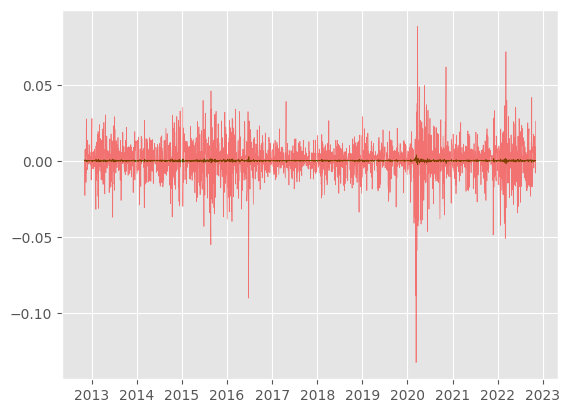

In [62]:
plt.plot(model_fit.predict(), c='g', alpha=1, linewidth=0.5);
plt.plot(df['log_returns'],c='r', alpha=0.5, linewidth=0.5);
plt.show()

In [65]:
df['log_returns']*100

Date
2012-11-05         NaN
2012-11-06    0.723051
2012-11-07   -2.266872
2012-11-08    0.001201
2012-11-09    0.027836
                ...   
2022-10-31    0.125025
2022-11-01    0.921234
2022-11-02   -0.797746
2022-11-03   -0.799154
2022-11-04    2.613622
Name: log_returns, Length: 2510, dtype: float64

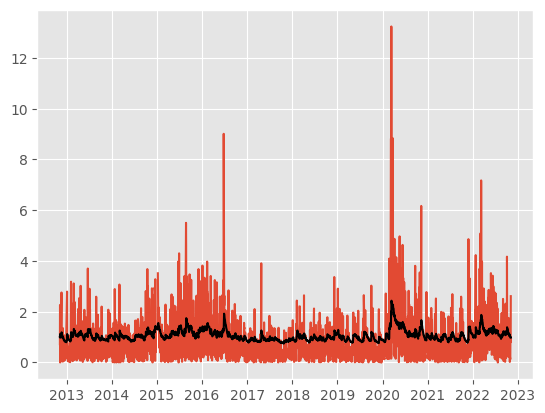

In [67]:
plt.plot(100*np.abs(df['log_returns']));
plt.plot(np.sqrt(garch_model_resid_fit.conditional_volatility), c='k');
plt.show()

In [69]:
standardised_residuals = (df['log_returns']- arma_model_fit.predict())/np.sqrt(garch_model_resid_fit.conditional_volatility)
standardised_residuals

Date
2012-11-05         NaN
2012-11-06    0.007100
2012-11-07   -0.023016
2012-11-08   -0.000743
2012-11-09    0.000198
                ...   
2022-10-31    0.001156
2022-11-01    0.009306
2022-11-02   -0.008067
2022-11-03   -0.008623
2022-11-04    0.026302
Length: 2510, dtype: float64

In [80]:
kde = ss.t(standardised_residuals)
kde

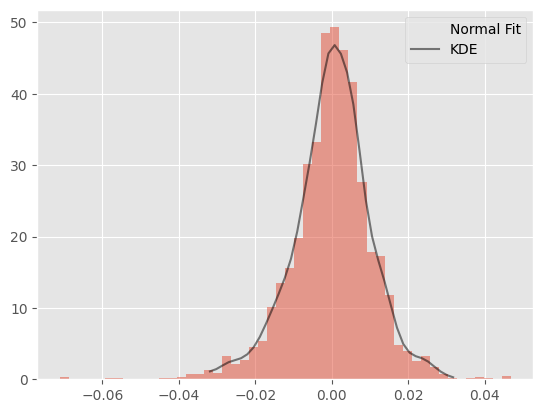

In [85]:
#plt.hist(standardised_residuals, bins=100);plt.show()

errors_std = np.std(standardised_residuals)
errors_mu = np.mean(standardised_residuals)

kde = ss.gaussian_kde(standardised_residuals.dropna())

x = np.linspace(errors_mu - 3*errors_std, errors_mu + 3*errors_std, 40)


plt.hist(standardised_residuals, bins=50, density=True, alpha=0.5);
plt.plot(x, ss.t.pdf(x, errors_mu, errors_std), label= 'Normal Fit', alpha=0.);

plt.plot(x, kde(x), label='KDE', color='k', alpha=0.5);

plt.legend(); plt.show()


In [88]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist=stats.distributions.t, plot=pylab)
pylab.show()

TypeError: _parse_args() missing 1 required positional argument: 'df'

In [42]:
arma_model_fit.resid

Date
2012-11-05         NaN
2012-11-06    0.007076
2012-11-07   -0.022617
2012-11-08   -0.000834
2012-11-09    0.000214
                ...   
2022-10-31    0.001163
2022-11-01    0.009080
2022-11-02   -0.007872
2022-11-03   -0.008418
2022-11-04    0.025782
Length: 2510, dtype: float64

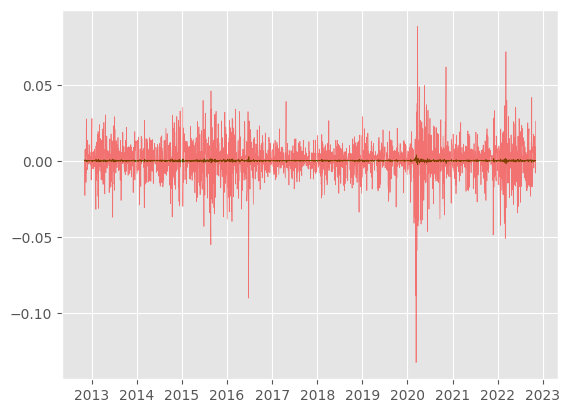

In [38]:
model_fit.predict()




In [40]:

residuals



model = arch_model(df['log_returns'].dropna(),
                 mean='Constant', 
                 vol='GARCH', 
                 p=1, q=1, rescale=True, dist='normal')

model_fit = model.fit()

Date
2012-11-05         NaN
2012-11-06    0.007076
2012-11-07   -0.022617
2012-11-08   -0.000834
2012-11-09    0.000214
                ...   
2022-10-31    0.001163
2022-11-01    0.009080
2022-11-02   -0.007872
2022-11-03   -0.008418
2022-11-04    0.025782
Length: 2510, dtype: float64

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            log_returns   No. Observations:                 2510
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7423.884
Date:                Fri, 11 Nov 2022   AIC                         -14839.768
Time:                        12:47:56   BIC                         -14816.456
Sample:                             0   HQIC                        -14831.307
                               - 2510                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.613      0.540      -0.000       0.001
ar.L1         -0.1665      0.431     -0.386      0.700      -1.012       0.679
ma.L1          0.1375      0.436      0.316      0.752      -0.716       0.991
sigma2         0.0002   1.84e-06     84.151      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             11025.26
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
## copied from https://medium.com/analytics-vidhya/arima-garch-forecasting-with-python-7a3f797de3ff



import pmdarima
import arch

# fit ARIMA on returns 
arima_model_fitted = pmdarima.auto_arima(returns)
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

# fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

# Use ARIMA to predict mu
predicted_mu = arima_model.predict(n_periods=1)[0]
# Use GARCH to predict the residual
garch_forecast = garch_model.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et


NameError: name 'returns' is not defined